# Lab 4 - ML Classification SVMs, NN, CNN

|| Name: Pallav Shukla || 
Student Number : 2154638 || 
Assignment : Machine Learning Lab : 04 ||


Loading libraries and data set

Installing TensorFlow: https://www.tensorflow.org/install open Anaconda cmd prompt as administrator and run the commands `pip install --upgrade pip` and `pip install tensorflow`


In [186]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.svm import SVC

print("Libraries loaded at",dt.datetime.now())

Libraries loaded at 2022-04-04 12:11:21.821753


## Load in the wine data and divide it into training and testing sets

In [187]:
wine_data = np.load('wineData.npy')
wine_labels = np.load('wineLabels.npy')

X_trn, X_tst, y_trn, y_tst = train_test_split(wine_data, wine_labels, test_size=0.2)

##### Print out some stats about the data

In [188]:
print(f'Number of features: {X_trn.shape[1]}')
print(f'Number of training samples: {X_trn.shape[0]}')
print(f'Number of testing samples: {X_tst.shape[0]}')
print(f'Number of classes: {len(np.unique(y_trn))}')

Number of features: 13
Number of training samples: 142
Number of testing samples: 36
Number of classes: 3


##### Plot the first two feautre dimensions against eachother, colouring by class label

Coloring the labels at :  2022-04-04 12:11:27.900782


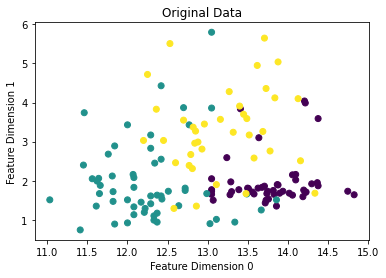

In [189]:
plt.figure()
plt.scatter(X_trn[:,0], X_trn[:,1], c=y_trn)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Original Data')
print("Coloring the labels at : ",dt.datetime.now())

## Task 4.1 – Multiclass SVM for Wine Data

### Data Standardisation
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [190]:
## Normalise the data (helps with convergence)
normaliser = StandardScaler()
X_trn = normaliser.fit_transform(X_trn)
X_tst = normaliser.transform(X_tst)
print("Data Standardised at",dt.datetime.now())

Data Standardised at 2022-04-04 12:11:28.049628


Text(0.5, 1.0, 'Original Data')

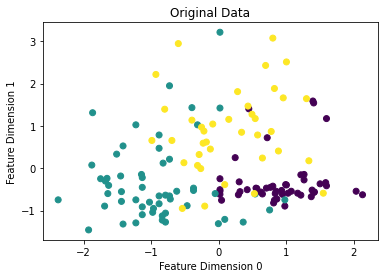

In [191]:
plt.figure()
plt.scatter(X_trn[:,0], X_trn[:,1], c=y_trn)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Original Data')

Reference:
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [192]:
# Muti-class SVM
clf = SVC() #C= .1, kernel='linear', gamma= 1
clf.fit(X_trn, y_trn)
print("Model Fitted")

Model Fitted


#### Accuracy using score()
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score

In [193]:
#Predict
predict = clf.predict(X_tst)
print(predict)
#Accuracy
print(clf.score(X_tst,predict))
# print(X_tst)

[2 1 1 0 0 1 0 2 2 1 0 0 1 0 0 1 1 1 2 2 2 1 2 1 0 1 1 2 1 2 0 0 1 2 0 1]
1.0


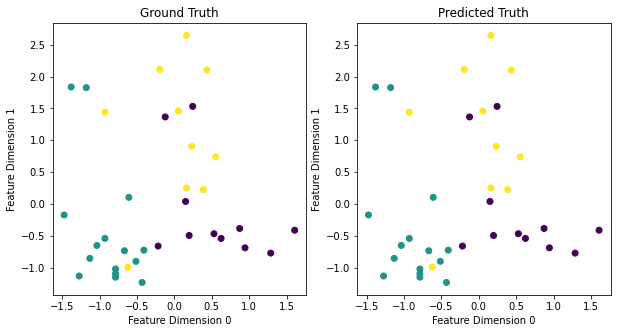

In [194]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_tst[:,0], X_tst[:,1], c=y_tst)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Ground Truth')

plt.subplot(122)
plt.scatter(X_tst[:,0], X_tst[:,1], c=predict)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Predicted Truth')
plt.show()

### Trying with changing hyperparamters
Reference: https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
<br>**C parameter** adds a penalty for each misclassified data point. If **c is small**, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a **greater number of misclassifications.** 
<br><br>**Kernel functions:** In some cases, data points that are not linearly separable are transformed using kernel functions so that they become linearly separable. Kernel function is kind of a similarity measure. The inputs are original features and the output is a similarity measure in the new feature space. Similarity here means a degree of closeness. 
<br><br>**gamma parameter:** Gamma parameter of RBF(Radial Basis Function) controls the distance of influence of a single training point. **Low values** of gamma indicates a **large similarity radius** which results in **more points being grouped together**. For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). 

Model Fitted
[2 1 1 0 0 1 0 2 2 1 0 0 1 0 0 1 1 1 2 2 2 1 2 1 0 1 1 2 1 2 0 0 1 2 0 1]
1.0


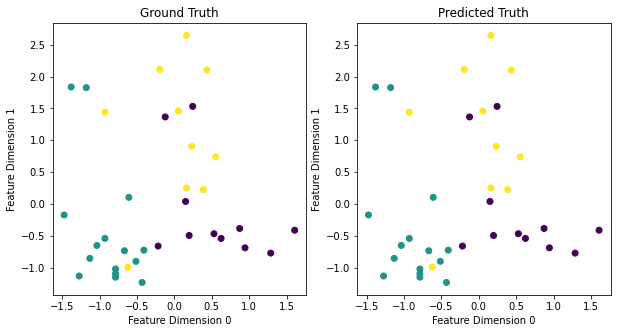

In [195]:
# Muti-class SVM
clf = SVC(C=0.1, kernel='linear', gamma = 1)
clf.fit(X_trn, y_trn)
print("Model Fitted")
#Predict
predict = clf.predict(X_tst)
print(predict)
#Accuracy
print(clf.score(X_tst,predict))
# print(X_tst)
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_tst[:,0], X_tst[:,1], c=y_tst)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Ground Truth')

plt.subplot(122)
plt.scatter(X_tst[:,0], X_tst[:,1], c=predict)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Predicted Truth')
plt.show()

Dataset seems to be too small to try-out hyperparamters

In [196]:
print(dt.datetime.now())

2022-04-04 12:11:28.842455


## Task 4.2 – Neural Network for Wine Data

### Building a Tensorflow Keras model
Refrence: https://www.tensorflow.org/guide/keras/sequential_model

Model highlights:
- Dense layer is a **fully connected layer**.
- Each layer in the list is a constructor call, creating their own instance of a Dense object/layer in the model.
- Creating 2 hidden layers with sizes 2 and 4.
- Output layer size = number of classes in the dataset

In [197]:
#Using same standardised data as above that is X_trn,X_tst,y_trn,y_tst
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_trn)), activation=tf.nn.softmax)])

Compiling the model

In [198]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [199]:
history = model.fit(X_trn, y_trn, epochs=150, validation_split=0.2, verbose=1)

Epoch 1/150
4/4 [==============================] - 0s 55ms/step - loss: 1.0691 - sparse_categorical_accuracy: 0.3982 - val_loss: 1.0772 - val_sparse_categorical_accuracy: 0.3103
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 1.0484 - sparse_categorical_accuracy: 0.3982 - val_loss: 1.0640 - val_sparse_categorical_accuracy: 0.3103
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 1.0298 - sparse_categorical_accuracy: 0.4425 - val_loss: 1.0524 - val_sparse_categorical_accuracy: 0.3793
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 1.0124 - sparse_categorical_accuracy: 0.4867 - val_loss: 1.0411 - val_sparse_categorical_accuracy: 0.4483
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 0.9964 - sparse_categorical_accuracy: 0.5221 - val_loss: 1.0302 - val_sparse_categorical_accuracy: 0.4828
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 0.9809 - sparse_categorical_accuracy: 

In [200]:
#model summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 4)                 56        
                                                                 
 dense_35 (Dense)            (None, 10)                50        
                                                                 
 dense_36 (Dense)            (None, 3)                 33        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


#### Plot of Ground Truth vs. Neural Network predictions.

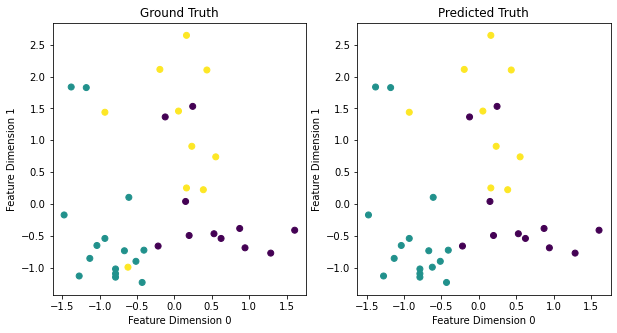

In [201]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_tst[:,0], X_tst[:,1], c=y_tst)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Ground Truth')

plt.subplot(122)
plt.scatter(X_tst[:,0], X_tst[:,1], c=np.argmax(model.predict(X_tst), axis=1))
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Predicted Truth')
plt.show()

#### Plotting training curves: Accuracy and Loss curve

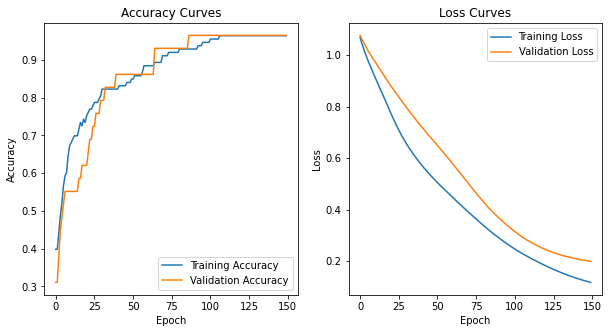

In [202]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [203]:
results = model.evaluate(X_tst, y_tst)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

2/2 [==============================] - 0s 3ms/step - loss: 0.1136 - sparse_categorical_accuracy: 0.9722
Test set loss: 0.11, test set accuracy: 97.22%


## Task 4.3 – Neural Network for Digit Recognition

#### Load MNIST dataset

In [204]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [205]:
print(f'MNIST sample shape: {x_train.shape[1:]}')
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(f'Number of classes: {len(np.unique(y_train))}')

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10


Text(0.5, 1.0, 'Digit 4')

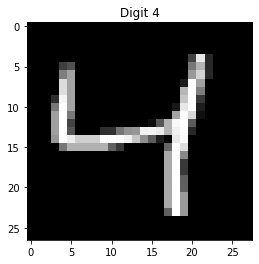

In [206]:
four = x_train[2, 1:]
four.shape
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

#### Reshaping the dataset to fit in the model

In [207]:
x_trainf=x_train.reshape(60000,784)
x_testf=x_test.reshape(10000,784)
print(x_trainf.shape)
print(x_testf.shape)

(60000, 784)
(10000, 784)


#### Normalize by dividing by 255 (maximum number in the array)

In [208]:
x_trainf = x_trainf/255
x_testf  = x_testf/255

#### Creating and training a Tensorflow Fully Connected Neural Network

In [209]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

#### Fitting the training data

In [210]:
history = model.fit(x_trainf, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1732 - sparse_categorical_accuracy: 0.6268 - val_loss: 0.6423 - val_sparse_categorical_accuracy: 0.7993
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6072 - sparse_categorical_accuracy: 0.8170 - val_loss: 0.5257 - val_sparse_categorical_accuracy: 0.8411
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5413 - sparse_categorical_accuracy: 0.8391 - val_loss: 0.4857 - val_sparse_categorical_accuracy: 0.8533
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5079 - sparse_categorical_accuracy: 0.8497 - val_loss: 0.4633 - val_sparse_categorical_accuracy: 0.8599
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4868 - sparse_categorical_accuracy: 0.8569 - val_loss: 0.4514 - val_sparse_categorical_accuracy: 0.8640
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4728 -

In [211]:
#model summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (32, 4)                   3140      
                                                                 
 dense_38 (Dense)            (32, 50)                  250       
                                                                 
 dense_39 (Dense)            (32, 10)                  510       
                                                                 
Total params: 3,900
Trainable params: 3,900
Non-trainable params: 0
_________________________________________________________________


In [212]:
results = model.evaluate(x_testf, y_test)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.3730 - sparse_categorical_accuracy: 0.8886
Test set loss: 0.37, test set accuracy: 88.86%


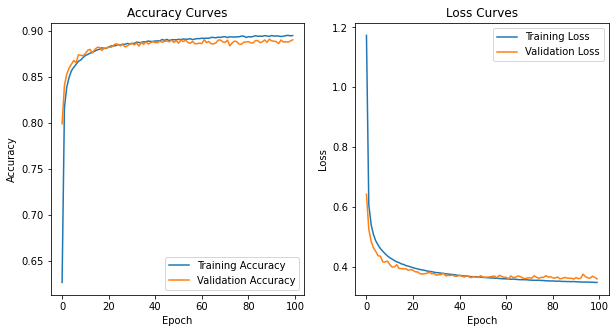

In [213]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()
plt.grid()

## Task 4.4 – Convolutional Neural Network for Digit Recognition

#### Loading the data

In [214]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Expanding the data to have channel dimension to be used in CNN
Reference: https://keras.io/examples/vision/mnist_convnet/

In [215]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### Normalizing the data in range of [0,1]

In [216]:
# Scaling images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#### Creating and training the TF CNN via Conv2D and pooling layers
References:
- https://cnvrg.io/cnn-tensorflow/
- https://www.tensorflow.org/tutorials/images/cnn
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
- https://deepnote.com/@svpino/MNIST-with-Convolutional-Neural-Networks-pLPEErgCQYWYBgJkD7ugLg
- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
- https://keras.io/api/layers/core_layers/dense/

Softmax refrence: https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax
Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would. Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer. **Drawback** Softmax assumes that each example is a member of exactly one class. 

In [217]:
number_of_classes = len(np.unique(y_train))
print(f'Number of Classes: {number_of_classes}')

Number of Classes: 10


In [218]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # 32 number of filters
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(number_of_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1600)            

[Reference](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/#:~:text=We%20also%20know%20that%20there%20are%2010%20classes%20and%20that%20classes%20are%20represented%20as%20unique%20integers)
One hot encoding: transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes.

In [219]:
# converting class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, number_of_classes)
y_test = keras.utils.to_categorical(y_test, number_of_classes)

#### Train the model

In [220]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [221]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 20s 53ms/step - loss: 0.3839 - accuracy: 0.8830 - val_loss: 0.1007 - val_accuracy: 0.9728
Epoch 2/15
375/375 [==============================] - 20s 52ms/step - loss: 0.1184 - accuracy: 0.9639 - val_loss: 0.0726 - val_accuracy: 0.9809
Epoch 3/15
375/375 [==============================] - 20s 53ms/step - loss: 0.0905 - accuracy: 0.9717 - val_loss: 0.0565 - val_accuracy: 0.9845
Epoch 4/15
375/375 [==============================] - 20s 53ms/step - loss: 0.0757 - accuracy: 0.9762 - val_loss: 0.0511 - val_accuracy: 0.9858
Epoch 5/15
375/375 [==============================] - 20s 52ms/step - loss: 0.0676 - accuracy: 0.9790 - val_loss: 0.0457 - val_accuracy: 0.9869
Epoch 6/15
375/375 [==============================] - 20s 52ms/step - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.0443 - val_accuracy: 0.9874
Epoch 7/15
375/375 [==============================] - 19s 51ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0423 - val_accuracy:

#### Evaluate the trained model 
Reference:
https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

In [222]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy:{score[1]*100:0.4f}%')


Test accuracy:99.2000%


In [223]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


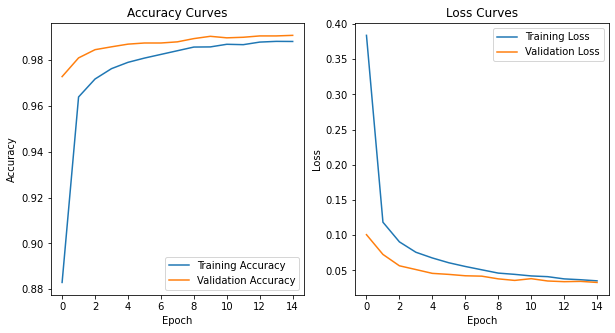

Evaluation Complete :  2022-04-04 12:20:24.403610


In [224]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()
print("Evaluation Complete : ",dt.datetime.now())